# Reference

https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d

# Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simple sample data

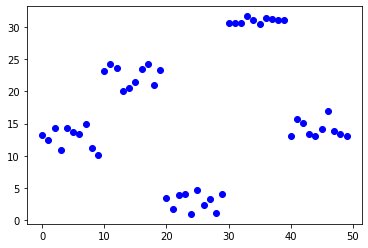

In [47]:
np.random.seed(18)

x = np.arange(0,50)

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5)).flatten()

plt.plot(x, y, 'bo')

# Linear regression from scratch

Gradient boosting takes a simple model and fits the model again on the residuals of the first model. For this exercise I'll use linear regression and implement it from scratch for fun. This works with other model types and is more common with decision trees.

In [78]:
class LinearRegression:
    """
    Ordinary Least Square Method
    Reference: https://mubaris.com/posts/linear-regression/
    """
    def __init__(self, x, y):
        # y = mx + b
        m, b = self._fit(x, y)
        self._m = m
        self._b = b
        
    def _fit(self, x, y):
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        
        # calculate m
        num = 0
        den = 0
        for x_i, y_i in zip(x, y):
            num += (x_i - x_mean) * (y_i - y_mean)
            den += (x_i - x_mean) ** 2
            
        m = num / den
        b = y_mean - m * x_mean
                
        return (m, b)
    
    def predict(self, x):
        y_pred = []
        for x_i in x:
            y_pred.append(self._m * x_i + self._b)
            
        return y_pred
   

# TODO this may be implemented wrong
def r2(y, y_pred):
    y_mean = np.mean(y)
    mean_sum = 0
    res_sum = 0
    
    for y_i, y_pred_i in zip(y, y_pred):
        mean_sum = (y_i - y_mean) ** 2
        res_sum = (y_i - y_pred_i) ** 2
        
    return 1 - res_sum / mean_sum

r^2: -1.894606397029099


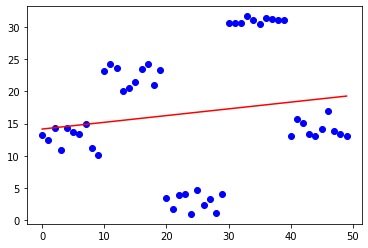

In [82]:
model = LinearRegression(x, y)
y_pred = model.predict(x)
print("r^2: {}".format(r2(y, y_pred)))

plt.plot(x, y, 'bo')
plt.plot(x, y_pred, 'r')